<a href="https://colab.research.google.com/github/H-Seung/seung_project/blob/main/section2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 데이터 불러오기

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
pd.set_option('display.float_format', '{:,.3f}'.format)
pd.set_option('display.max_columns', None)

In [15]:
data_org = pd.read_csv('적조발생예측데이터_rev.csv', encoding='UTF-8', index_col=[0])
data_asos = pd.read_csv('ASOS_여수_2014010120180831_rev.csv', encoding='cp949')
data_water_sup = pd.read_csv('하천수의_수질현황영산강권역_201405201612.csv', encoding='cp949') # 2014-06-01 ~ 2017-01-01 - Solidity, Turbidity, DO, COD, pH, TN, TP 보충용도
data = data_org.copy()

In [16]:
data.columns

Index(['Date', 'Temp', 'Rainfall_day', 'WindSpeed', 'Atm', 'Solidity', 'DO',
       'COD', 'pH', 'Turbidity', 'TN', 'TP', 'Min_Density', 'Max_Density',
       'Cochlo_YN '],
      dtype='object')

In [17]:
data_water_sup.columns

Index(['시점', '수계별(1)', '수계별(2)', '수계별(3)', '용존산소 DO (㎎/ℓ)',
       '화학적산소요구량 COD (㎎/ℓ)', '수온 (℃)', '수소이온농도 (pH)', '총질소 T-N (㎎/ℓ)',
       '총인 T-P (㎎/ℓ)', 'TOC (㎎/ℓ)'],
      dtype='object')

In [18]:
data.head(5)

,Date,Temp,Rainfall_day,WindSpeed,Atm,Solidity,DO,COD,pH,Turbidity,TN,TP,Min_Density,Max_Density,Cochlo_YN
0,2014-01-01,7.700,0.000,5.263,"1,015.147",29.287,10.071,1.168,7.843,262.742,0.290,0.026,0,0,0
1,2014-01-02,7.700,0.000,1.219,"1,019.767",29.270,10.001,1.297,7.859,194.517,0.290,0.026,0,0,0
2,2014-01-03,7.700,0.000,1.238,"1,016.513",29.274,9.984,1.163,7.846,86.668,0.290,0.026,0,0,0
3,2014-01-04,7.800,0.000,2.419,"1,016.210",29.235,9.946,0.845,7.850,68.625,0.290,0.026,0,0,0
4,2014-01-05,7.700,0.000,2.688,"1,020.507",29.284,9.889,0.818,7.869,85.875,0.290,0.028,0,0,0


In [19]:
data_asos.head(5)

,station_num,station,Date,Temp,Rainfall_Dur,Rainfall,Wind_Speed,Sunshine
0,168,여수,2014-01-01,7.200,NaN,NaN,6.400,8.500
1,168,여수,2014-01-02,6.400,NaN,NaN,1.500,7.100
2,168,여수,2014-01-03,6.700,NaN,NaN,1.700,7.300
3,168,여수,2014-01-04,6.000,NaN,NaN,4.300,8.900
4,168,여수,2014-01-05,4.500,NaN,NaN,3.500,8.700


In [20]:
data_water_sup.head(5)

,시점,수계별(1),수계별(2),수계별(3),용존산소 DO (㎎/ℓ),화학적산소요구량 COD (㎎/ℓ),수온 (℃),수소이온농도 (pH),총질소 T-N (㎎/ℓ),총인 T-P (㎎/ℓ),TOC (㎎/ℓ)
0,2014-05-01,기타,금산면,오천천,9.500,1.900,17.400,8.700,1.335,0.007,1.1
1,2014-05-01,기타,이사천,이사천1,11.200,2.800,18.000,8.400,1.041,0.026,1.1
2,2014-05-01,기타,이사천,이사천2,9.500,2.100,16.200,7.900,1.120,0.018,1.3
3,2014-05-01,기타,수어천,수어천,8.800,2.100,21.000,7.400,1.651,0.015,0.8
4,2014-05-01,기타,수어천,수어천1,8.400,0.600,21.000,7.500,0.922,0.030,1.8


# 2 데이터 전처리 & EDA

In [6]:
data_asos = data_asos.drop(['station_num', 'station', 'Temp', 'Rainfall', 'Wind_Speed'], axis=1) # 필요없거나 data와 중복되는 컬럼 drop
data_water_sup = data_water_sup.drop(['수계별(1)', '수계별(2)', '수계별(3)','수온 (℃)','TOC (㎎/ℓ)'], axis = 1)
data = data.drop(['Solidity','Turbidity','Cochlo_YN '], axis = 1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2068 non-null   object 
 1   Temp          2068 non-null   float64
 2   Rainfall_day  2068 non-null   float64
 3   WindSpeed     2068 non-null   float64
 4   Atm           2068 non-null   float64
 5   DO            2068 non-null   float64
 6   COD           2068 non-null   float64
 7   pH            2068 non-null   float64
 8   TN            2068 non-null   float64
 9   TP            2068 non-null   float64
 10  Min_Density   2068 non-null   int64  
 11  Max_Density   2068 non-null   int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 210.0+ KB


In [8]:
data_asos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2069 non-null   object 
 1   Rainfall_Dur  728 non-null    float64
 2   Sunshine      2069 non-null   float64
dtypes: float64(2), object(1)
memory usage: 48.6+ KB


In [9]:
data_water_sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   시점                  190 non-null    object 
 1   용존산소 DO (㎎/ℓ)       190 non-null    float64
 2   화학적산소요구량 COD (㎎/ℓ)  190 non-null    float64
 3   수소이온농도 (pH)         190 non-null    float64
 4   총질소 T-N (㎎/ℓ)       190 non-null    float64
 5   총인 T-P (㎎/ℓ)        190 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.0+ KB


In [10]:
pd.to_datetime('2015.05')

Timestamp('2015-05-01 00:00:00')

In [11]:
# data_water_sup 컬럼명 변경
data_water_sup.columns = ['Date','DO','COD','pH','TN','TP']
data_water_sup.columns

Index(['Date', 'DO', 'COD', 'pH', 'TN', 'TP'], dtype='object')

In [12]:
# Date컬럼 날짜 타입으로 변환 & 일자를 key로 하여 합침
## data, data_asos merge
data['Date'] = pd.to_datetime(data['Date'])
data_asos['Date'] = pd.to_datetime(data_asos['Date'])
data_water_sup['Date'] = pd.to_datetime(data_water_sup['Date'])

data = data.merge(data_asos, on=['Date'])

In [13]:
col_order = ['Date', 'Temp', 'Rainfall_Dur', 'Rainfall_day', 'WindSpeed', 'Atm', 'Sunshine',
        'DO', 'COD', 'pH', 'TN', 'TP', 'Min_Density', 'Max_Density']
data = data[col_order]

data['Rainfall_Dur'] = data['Rainfall_Dur'].fillna(0)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2068 non-null   datetime64[ns]
 1   Temp          2068 non-null   float64       
 2   Rainfall_Dur  2068 non-null   float64       
 3   Rainfall_day  2068 non-null   float64       
 4   WindSpeed     2068 non-null   float64       
 5   Atm           2068 non-null   float64       
 6   Sunshine      2068 non-null   float64       
 7   DO            2068 non-null   float64       
 8   COD           2068 non-null   float64       
 9   pH            2068 non-null   float64       
 10  TN            2068 non-null   float64       
 11  TP            2068 non-null   float64       
 12  Min_Density   2068 non-null   int64         
 13  Max_Density   2068 non-null   int64         
dtypes: datetime64[ns](1), float64(11), int64(2)
memory usage: 242.3 KB


In [14]:
data.tail(20)

,Date,Temp,Rainfall_Dur,Rainfall_day,WindSpeed,Atm,Sunshine,DO,COD,pH,TN,TP,Min_Density,Max_Density
2048,2019-08-12,26.500,5.780,2.100,3.299,"1,001.549",0.100,5.029,4.479,7.996,0.136,0.040,0,0
2049,2019-08-13,26.700,0.000,0.000,1.153,"1,001.720",11.500,5.681,4.416,7.876,0.097,0.036,0,0
2050,2019-08-14,27.200,2.920,0.000,3.682,997.747,11.300,6.270,1.786,8.140,0.112,0.045,0,0
2051,2019-08-15,27.500,2.420,0.100,4.052,990.110,4.800,6.159,5.138,8.244,0.113,0.046,0,0
2052,2019-08-16,26.900,0.000,0.000,5.205,995.604,10.400,5.628,6.159,8.165,0.146,0.049,0,0
2053,2019-08-17,25.900,0.000,0.000,3.156,"1,002.491",12.400,5.661,6.189,8.129,0.209,0.054,0,0
2054,2019-08-18,25.400,0.000,0.000,1.801,"1,005.505",10.800,5.562,6.050,8.075,0.150,0.061,0,0
2055,2019-08-19,25.300,0.000,0.000,1.520,"1,008.088",7.200,5.346,6.292,8.071,0.155,0.062,0,0
2056,2019-08-20,25.400,0.000,0.000,2.081,"1,008.771",4.500,5.041,5.518,8.029,0.150,0.066,30,30
2057,2019-08-21,25.400,6.700,18.400,1.186,"1,008.447",0.600,4.530,6.000,7.981,0.159,0.068,40,88


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,"2,068.000",16.443,6.731,3.900,10.300,16.450,22.800,29.000
Rainfall_Dur,"2,068.000",2.273,4.563,0.000,0.000,0.000,2.000,24.000
Rainfall_day,"2,068.000",3.906,13.957,0.000,0.000,0.000,0.100,223.600
WindSpeed,"2,068.000",3.018,1.492,0.400,1.873,2.652,3.885,12.449
Atm,"2,068.000","1,015.288",7.660,990.110,"1,009.273","1,015.379","1,021.368","1,034.145"
Sunshine,"2,068.000",6.911,4.097,0.000,3.500,8.200,10.100,13.600
DO,"2,068.000",8.857,1.907,0.000,8.623,9.078,9.153,14.079
COD,"2,068.000",2.624,1.205,0.000,2.331,2.331,2.743,8.910
pH,"2,068.000",8.051,0.640,0.000,7.960,8.248,8.248,8.575
TN,"2,068.000",0.231,0.120,0.000,0.139,0.288,0.288,1.219


## Temp

In [16]:
import matplotlib.dates as mdates
import datetime

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a futu

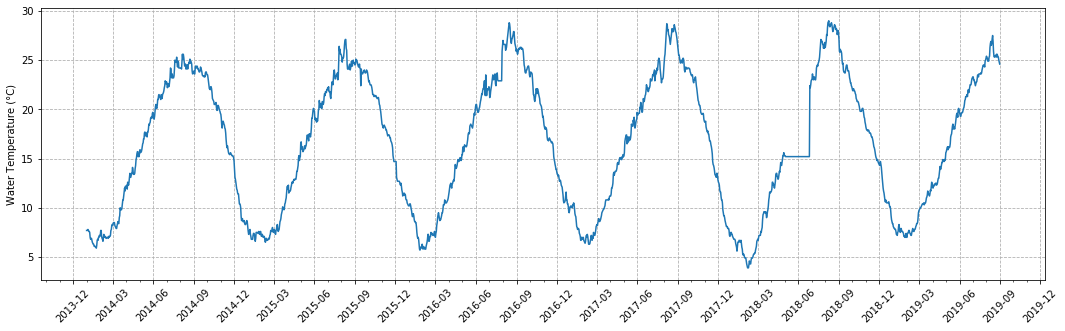

In [17]:
dateFmt = mdates.DateFormatter('%Y-%m')
fig1, ax1 = plt.subplots(figsize=(18,5))

plt.ylabel('Water Temperature (°C)')
plt.xticks(rotation=45)
ax1.plot(data.Date, data.Temp);

ax1.xaxis.set_major_formatter(dateFmt)  # 날짜 표시 형식
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # 3개월마다 메인 눈금을 표시
ax1.xaxis.set_minor_locator(mdates.MonthLocator(interval=1)) # 1개월마다 서브 눈금을 표시

plt.grid(True, linestyle='--')


In [18]:
print(ax1.get_xticks())

[735203. 735293. 735385. 735477. 735568. 735658. 735750. 735842. 735933.
 736024. 736116. 736208. 736299. 736389. 736481. 736573. 736664. 736754.
 736846. 736938. 737029. 737119. 737211. 737303. 737394.]


In [19]:
from pprint import pprint
pprint(ax1.get_xticklabels())

<a list of 25 Text xticklabel objects>


In [20]:
list(ax1.get_xticklabels())

[Text(735203.0, 0, '2013-12'),
 Text(735293.0, 0, '2014-03'),
 Text(735385.0, 0, '2014-06'),
 Text(735477.0, 0, '2014-09'),
 Text(735568.0, 0, '2014-12'),
 Text(735658.0, 0, '2015-03'),
 Text(735750.0, 0, '2015-06'),
 Text(735842.0, 0, '2015-09'),
 Text(735933.0, 0, '2015-12'),
 Text(736024.0, 0, '2016-03'),
 Text(736116.0, 0, '2016-06'),
 Text(736208.0, 0, '2016-09'),
 Text(736299.0, 0, '2016-12'),
 Text(736389.0, 0, '2017-03'),
 Text(736481.0, 0, '2017-06'),
 Text(736573.0, 0, '2017-09'),
 Text(736664.0, 0, '2017-12'),
 Text(736754.0, 0, '2018-03'),
 Text(736846.0, 0, '2018-06'),
 Text(736938.0, 0, '2018-09'),
 Text(737029.0, 0, '2018-12'),
 Text(737119.0, 0, '2019-03'),
 Text(737211.0, 0, '2019-06'),
 Text(737303.0, 0, '2019-09'),
 Text(737394.0, 0, '2019-12')]

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


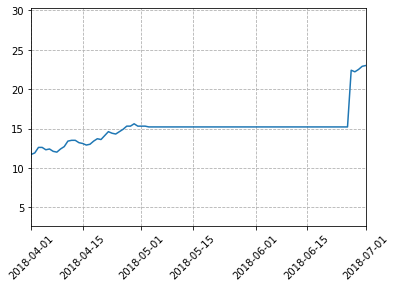

In [21]:
# 이상치 확인
plt.xticks(rotation=45)
plt.xlim(datetime.date(2018,4,1), datetime.date(2018,7,1))
plt.plot(data.Date, data.Temp);
plt.grid(True, linestyle='--')

In [22]:
data.query('(Date > "20180427") & (Date < "20180628")') # 이상치 확인  2018-04-30 ~ 2018-06-26

,Date,Temp,Rainfall_Dur,Rainfall_day,WindSpeed,Atm,Sunshine,DO,COD,pH,TN,TP,Min_Density,Max_Density
1577,2018-04-28,15.300,0.000,0.000,2.385,"1,016.519",11.400,9.239,3.682,8.310,0.135,0.019,0,0
1578,2018-04-29,15.600,0.000,0.000,3.143,"1,013.949",11.500,9.350,3.793,8.314,0.115,0.017,0,0
1579,2018-04-30,15.300,0.000,0.000,1.262,"1,014.794",1.800,8.639,4.091,8.285,0.116,0.021,0,0
1580,2018-05-01,15.300,4.220,3.500,0.520,"1,014.417",0.000,8.100,4.093,8.241,0.121,0.025,0,0
1581,2018-05-02,15.300,10.250,6.300,3.525,"1,005.824",0.000,8.010,4.220,8.243,0.142,0.019,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,2018-06-23,15.200,1.050,0.200,3.493,"1,004.782",8.600,8.120,5.441,7.911,0.073,0.044,0,0
1634,2018-06-24,15.200,0.000,0.000,2.476,"1,006.854",13.000,8.226,5.471,7.780,0.092,0.044,0,0
1635,2018-06-25,15.200,0.000,0.000,1.848,"1,010.551",12.000,7.415,5.491,7.613,0.063,0.044,0,0
1636,2018-06-26,15.200,7.470,1.200,2.965,"1,008.340",0.100,6.361,4.464,7.437,0.049,0.044,0,0


In [23]:
# Temp 이상치 NaN값으로 변경
ix = data.query('(Date > "20180502") & (Date < "20180627")').index

for i in ix :
    data.loc[i,'Temp'] = np.NaN

In [24]:
data.query('(Date > "20180502") & (Date < "20180627")')

,Date,Temp,Rainfall_Dur,Rainfall_day,WindSpeed,Atm,Sunshine,DO,COD,pH,TN,TP,Min_Density,Max_Density
1582,2018-05-03,NaN,0.570,0.000,6.294,"1,009.913",11.000,7.905,3.994,8.227,0.057,0.018,0,0
1583,2018-05-04,NaN,0.000,0.000,5.580,"1,014.840",12.900,8.134,3.636,8.224,0.062,0.021,0,0
1584,2018-05-05,NaN,0.000,0.000,2.411,"1,017.292",11.500,8.138,3.720,8.224,0.148,0.020,0,0
1585,2018-05-06,NaN,15.200,34.200,2.850,"1,007.979",0.000,7.647,3.850,8.186,0.145,0.021,0,0
1586,2018-05-07,NaN,8.850,26.900,2.069,"1,005.395",1.100,7.711,3.814,8.182,0.154,0.024,0,0
1587,2018-05-08,NaN,0.000,0.000,3.590,"1,011.493",2.100,7.850,4.059,8.159,0.134,0.037,0,0
1588,2018-05-09,NaN,0.000,0.000,3.691,"1,020.316",10.500,8.220,3.910,8.175,0.178,0.033,0,0
1589,2018-05-10,NaN,0.000,0.000,2.215,"1,022.463",11.000,8.457,3.262,8.171,0.083,0.033,0,0
1590,2018-05-11,NaN,0.000,0.000,1.991,"1,018.530",12.200,8.739,3.542,8.184,0.175,0.037,0,0
1591,2018-05-12,NaN,9.130,7.400,2.132,"1,012.588",0.000,7.882,3.561,8.144,0.170,0.034,0,0


In [25]:
# Temp 선형보간
data.Temp = data.Temp.interpolate(method='values')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a futu

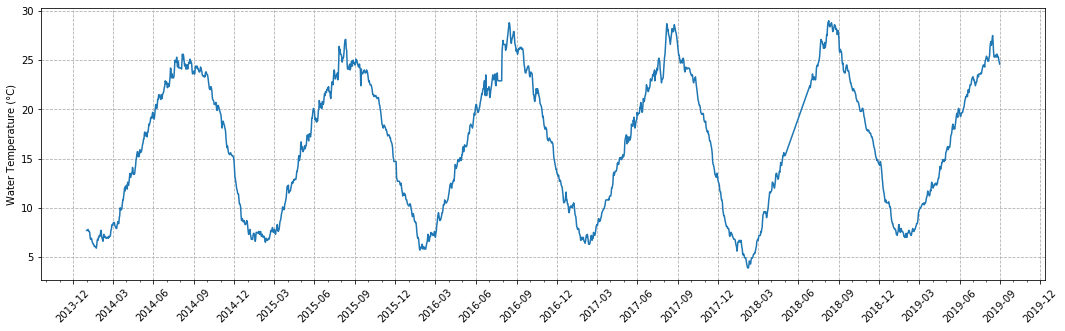

In [26]:
fig2, ax2 = plt.subplots(figsize=(18,5))

plt.ylabel('Water Temperature (°C)')
plt.xticks(rotation=45)
ax2.plot(data.Date, data.Temp);

ax2.xaxis.set_major_formatter(dateFmt)  # 날짜 표시 형식
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # 3개월마다 메인 눈금을 표시
ax2.xaxis.set_minor_locator(mdates.MonthLocator(interval=1)) # 1개월마다 서브 눈금을 표시

plt.grid(True, linestyle='--')


## Rainfall_day, Wind Speed 등

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed

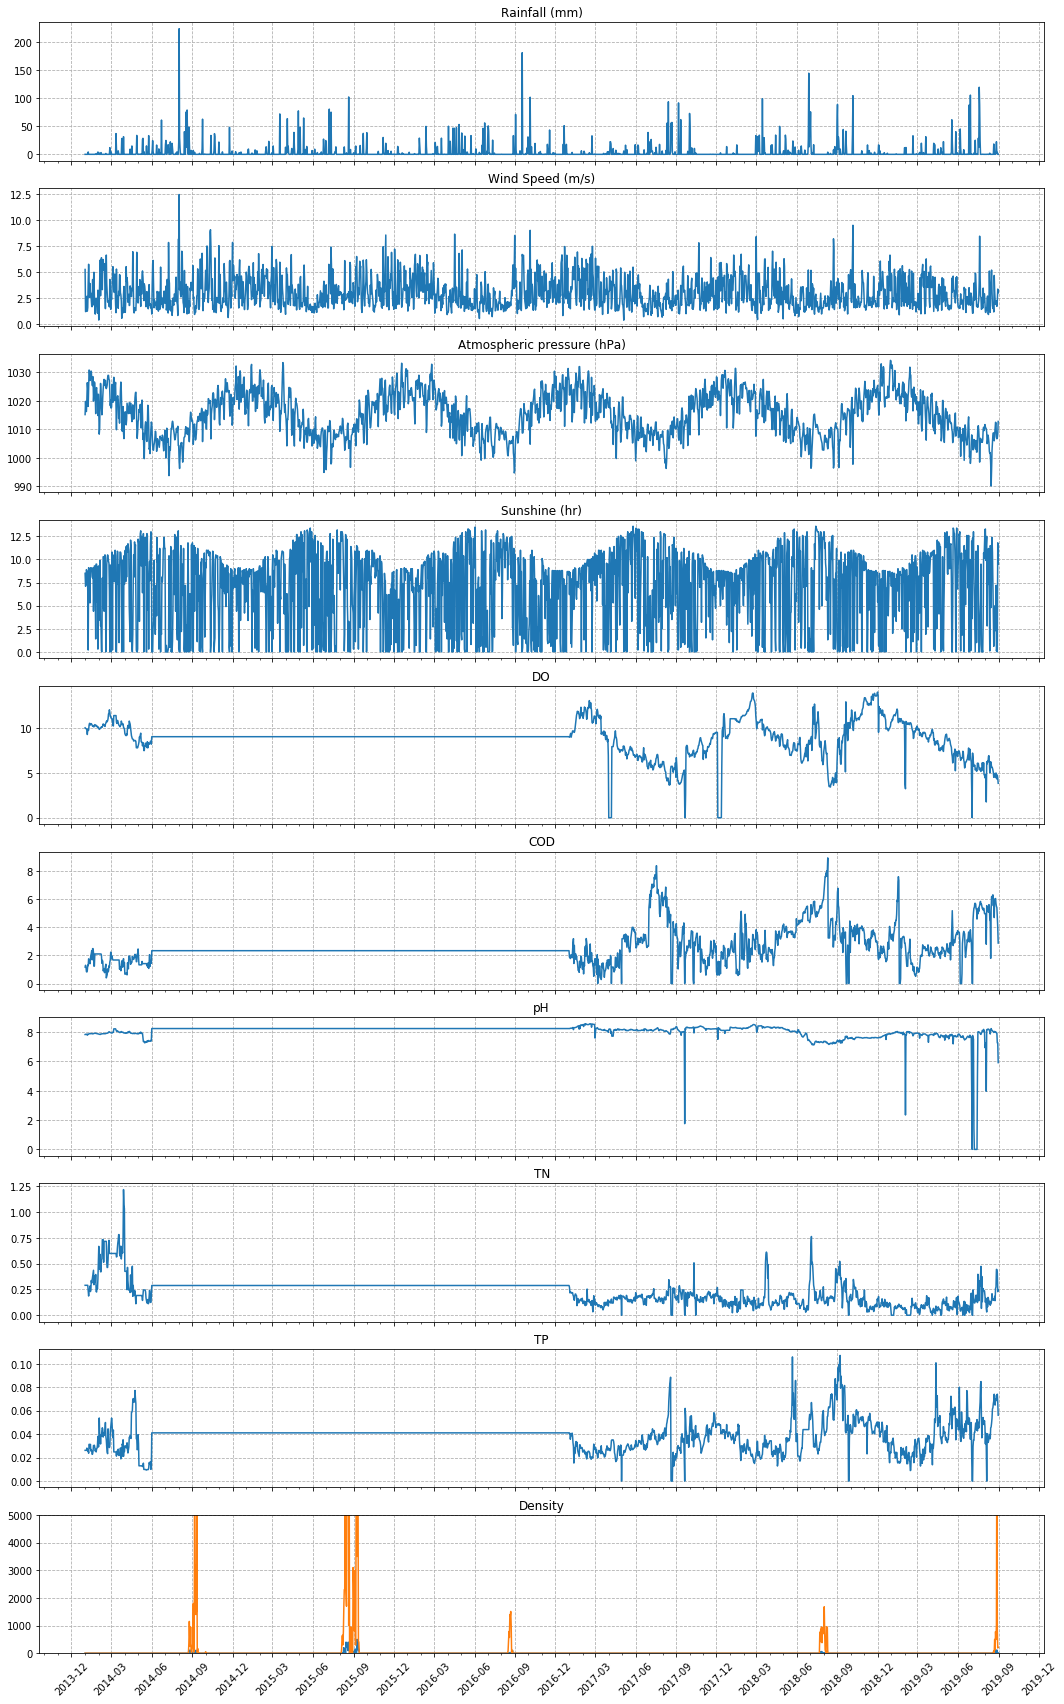

In [27]:
fig3, axs = plt.subplots(10,1,sharex=True, figsize=(18,30))
# fig.subplots_adjust(hspace=1)

plt.xticks(rotation=45)
axs[0].plot(data.Date, data.Rainfall_day);
axs[0].set_title('Rainfall (mm)')
axs[0].grid(True, linestyle='--')

axs[1].plot(data.Date, data.WindSpeed);
axs[1].set_title('Wind Speed (m/s)')
axs[1].grid(True, linestyle='--')

axs[2].plot(data.Date, data.Atm);
axs[2].set_title('Atmospheric pressure (hPa)')
axs[2].grid(True, linestyle='--')

axs[3].plot(data.Date, data.Sunshine);
axs[3].set_title('Sunshine (hr)')
axs[3].grid(True, linestyle='--')

axs[4].plot(data.Date, data.DO);
axs[4].set_title('DO')
axs[4].grid(True, linestyle='--')

axs[5].plot(data.Date, data.COD);
axs[5].set_title('COD')
axs[5].grid(True, linestyle='--')

axs[6].plot(data.Date, data.pH);
axs[6].set_title('pH')
axs[6].grid(True, linestyle='--')

axs[7].plot(data.Date, data.TN);
axs[7].set_title('TN')
axs[7].grid(True, linestyle='--')

axs[8].plot(data.Date, data.TP);
axs[8].set_title('TP')
axs[8].grid(True, linestyle='--')

plt.ylim(0,5000)
axs[9].plot(data.Date, data.Min_Density)
axs[9].plot(data.Date, data.Max_Density);
axs[9].set_title('Density')
axs[9].grid(True, linestyle='--')

axs[0].xaxis.set_major_formatter(dateFmt)  # 날짜 표시 형식
axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # 3개월마다 메인 눈금을 표시
axs[0].xaxis.set_minor_locator(mdates.MonthLocator(interval=1)) # 1개월마다 서브 눈금을 표시

In [28]:
data[(data['Date']>'20140530') & (data['Date']<'20170102')]

,Date,Temp,Rainfall_Dur,Rainfall_day,WindSpeed,Atm,Sunshine,DO,COD,pH,TN,TP,Min_Density,Max_Density
150,2014-05-31,19.700,0.000,0.000,1.851,"1,012.541",12.900,8.240,1.439,7.403,0.178,0.011,0,0
151,2014-06-01,19.500,0.000,0.000,0.987,"1,011.861",0.000,9.078,2.331,8.248,0.288,0.041,0,0
152,2014-06-02,19.100,8.300,8.000,3.826,"1,008.109",0.100,9.078,2.331,8.248,0.288,0.041,0,0
153,2014-06-03,19.000,22.750,24.400,5.812,"1,004.164",0.000,9.078,2.331,8.248,0.288,0.041,0,0
154,2014-06-04,19.300,7.170,5.200,6.128,"1,002.654",2.600,9.078,2.331,8.248,0.288,0.041,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2016-12-28,9.600,0.000,0.000,2.978,"1,027.253",8.700,9.078,2.331,8.248,0.288,0.041,0,0
1092,2016-12-29,9.500,0.000,0.000,5.410,"1,027.565",8.600,9.078,2.331,8.248,0.288,0.041,0,0
1093,2016-12-30,9.800,0.000,0.000,1.994,"1,031.312",8.700,9.078,2.331,8.248,0.288,0.041,0,0
1094,2016-12-31,10.100,0.000,0.000,3.143,"1,028.642",8.300,9.078,2.331,8.248,0.288,0.041,0,0


<이상치 처리해야할 것>

- DO, pH  이상치 대체

- 2014-06-01 ~ 2017-01-01 - DO, COD, pH, TN, TP

In [29]:
# DO 이상치 (3 미만) 제외한 min값으로 대체
DO_min = data[data['DO'] >= 3].DO.min()
data['DO'] = data['DO'].where(data['DO'] >= 3, DO_min)

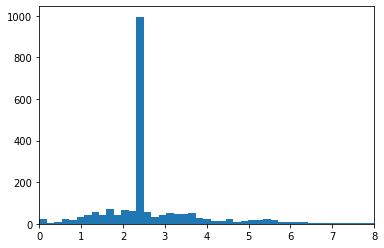

In [30]:
# COD 분포 확인
plt.xlim(0,8)
plt.hist(data['COD'], bins=50);

In [31]:
np.percentile(data['COD'], 3)

0.8077513236299999

In [32]:
# pH 이상치 (6 미만) 제외한 min값으로 대체
pH_min = data[data['pH'] >= 6].pH.min()
data['pH'] = data['pH'].where(data['pH'] >= 6, pH_min)

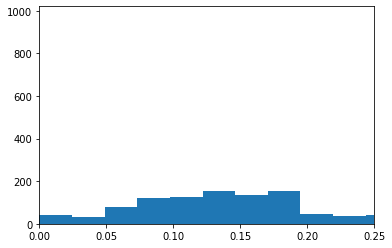

In [33]:
# TN 분포 확인
plt.xlim(0,0.25)
plt.hist(data['TN'], bins=50);

In [34]:
data['TN'].sort_values().unique()

array([0.        , 0.00740566, 0.00744643, ..., 1.03345454, 1.0711    ,
       1.2186    ])

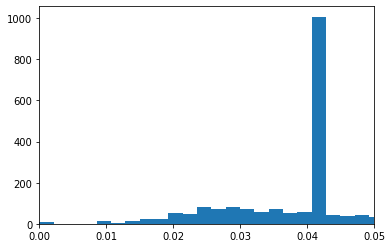

In [35]:
# TP 분포 확인
plt.xlim(0,0.05)
plt.hist(data['TP'], bins=50);

In [36]:
np.percentile(data['TP'], 3)

0.01657772681

→ DO, pH의 경우 일정 값 이하로 떨어지는 것은 거의 기기 또는 채수 문제로 인한 것이므로 해당 특성만 이상치 처리함.

In [37]:
# 2014-06-01 ~ 2017-01-01 의 데이터는 다른 데이터셋에서 월 평균치를 추가함
water_sup = data_water_sup.groupby('Date').mean().reset_index() # 수계별 데이터를 평균으로 취합
# 두 데이터프레임을 합치기 위해 키 컬럼 생성
data['y-m'] = data['Date'].dt.strftime('%Y-%m')
water_sup['y-m'] = water_sup['Date'].dt.strftime('%Y-%m')

In [38]:
data.columns

Index(['Date', 'Temp', 'Rainfall_Dur', 'Rainfall_day', 'WindSpeed', 'Atm',
       'Sunshine', 'DO', 'COD', 'pH', 'TN', 'TP', 'Min_Density', 'Max_Density',
       'y-m'],
      dtype='object')

In [39]:
water_sup.columns

Index(['Date', 'DO', 'COD', 'pH', 'TN', 'TP', 'y-m'], dtype='object')

In [40]:
water_sup=water_sup.drop(index=0)
water_sup.head()

,Date,DO,COD,pH,TN,TP,y-m
1,2014-06-01,9.040,2.260,7.760,1.107,0.031,2014-06
2,2014-07-01,9.617,2.300,7.783,1.282,0.024,2014-07
3,2014-08-01,8.300,2.550,7.467,1.655,0.036,2014-08
4,2014-09-01,8.650,2.517,7.417,1.287,0.025,2014-09
5,2014-10-01,8.583,2.483,7.483,1.006,0.023,2014-10


In [41]:
water_sup.tail()

,Date,DO,COD,pH,TN,TP,y-m
27,2016-08-01,8.317,2.233,7.417,1.155,0.028,2016-08
28,2016-09-01,8.483,2.717,8.017,1.001,0.025,2016-09
29,2016-10-01,9.033,2.817,7.700,1.457,0.031,2016-10
30,2016-11-01,9.917,2.083,7.583,1.436,0.062,2016-11
31,2016-12-01,12.050,2.100,7.633,0.981,0.018,2016-12


In [42]:
for i in water_sup.index:
    for j in data.index:
        if water_sup.loc[i,'y-m'] == data.loc[j,'y-m']:
            data.loc[j,['DO', 'COD', 'pH', 'TN', 'TP']] = water_sup.loc[i,['DO', 'COD', 'pH', 'TN', 'TP']]

In [43]:
data[(data['Date']>'20140530') & (data['Date']<'20170102')]

,Date,Temp,Rainfall_Dur,Rainfall_day,WindSpeed,Atm,Sunshine,DO,COD,pH,TN,TP,Min_Density,Max_Density,y-m
150,2014-05-31,19.700,0.000,0.000,1.851,"1,012.541",12.900,8.240,1.439,7.403,0.178,0.011,0,0,2014-05
151,2014-06-01,19.500,0.000,0.000,0.987,"1,011.861",0.000,9.040,2.260,7.760,1.107,0.031,0,0,2014-06
152,2014-06-02,19.100,8.300,8.000,3.826,"1,008.109",0.100,9.040,2.260,7.760,1.107,0.031,0,0,2014-06
153,2014-06-03,19.000,22.750,24.400,5.812,"1,004.164",0.000,9.040,2.260,7.760,1.107,0.031,0,0,2014-06
154,2014-06-04,19.300,7.170,5.200,6.128,"1,002.654",2.600,9.040,2.260,7.760,1.107,0.031,0,0,2014-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2016-12-28,9.600,0.000,0.000,2.978,"1,027.253",8.700,12.050,2.100,7.633,0.981,0.018,0,0,2016-12
1092,2016-12-29,9.500,0.000,0.000,5.410,"1,027.565",8.600,12.050,2.100,7.633,0.981,0.018,0,0,2016-12
1093,2016-12-30,9.800,0.000,0.000,1.994,"1,031.312",8.700,12.050,2.100,7.633,0.981,0.018,0,0,2016-12
1094,2016-12-31,10.100,0.000,0.000,3.143,"1,028.642",8.300,12.050,2.100,7.633,0.981,0.018,0,0,2016-12


In [44]:
for col in ['DO', 'COD', 'pH', 'TN', 'TP']:
    data.loc[1095,col] = data.loc[1096,col]
data[(data['Date']>'20161231') & (data['Date']<'20170104')]

,Date,Temp,Rainfall_Dur,Rainfall_day,WindSpeed,Atm,Sunshine,DO,COD,pH,TN,TP,Min_Density,Max_Density,y-m
1095,2017-01-01,10.100,0.000,0.000,1.619,"1,027.560",8.700,9.016,1.870,8.247,0.272,0.040,0,0,2017-01
1096,2017-01-02,10.200,0.850,0.000,2.928,"1,021.986",6.200,9.016,1.870,8.247,0.272,0.040,0,0,2017-01
1097,2017-01-03,10.100,0.000,0.000,2.716,"1,022.395",8.600,9.060,1.930,8.248,0.217,0.041,0,0,2017-01


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a futu

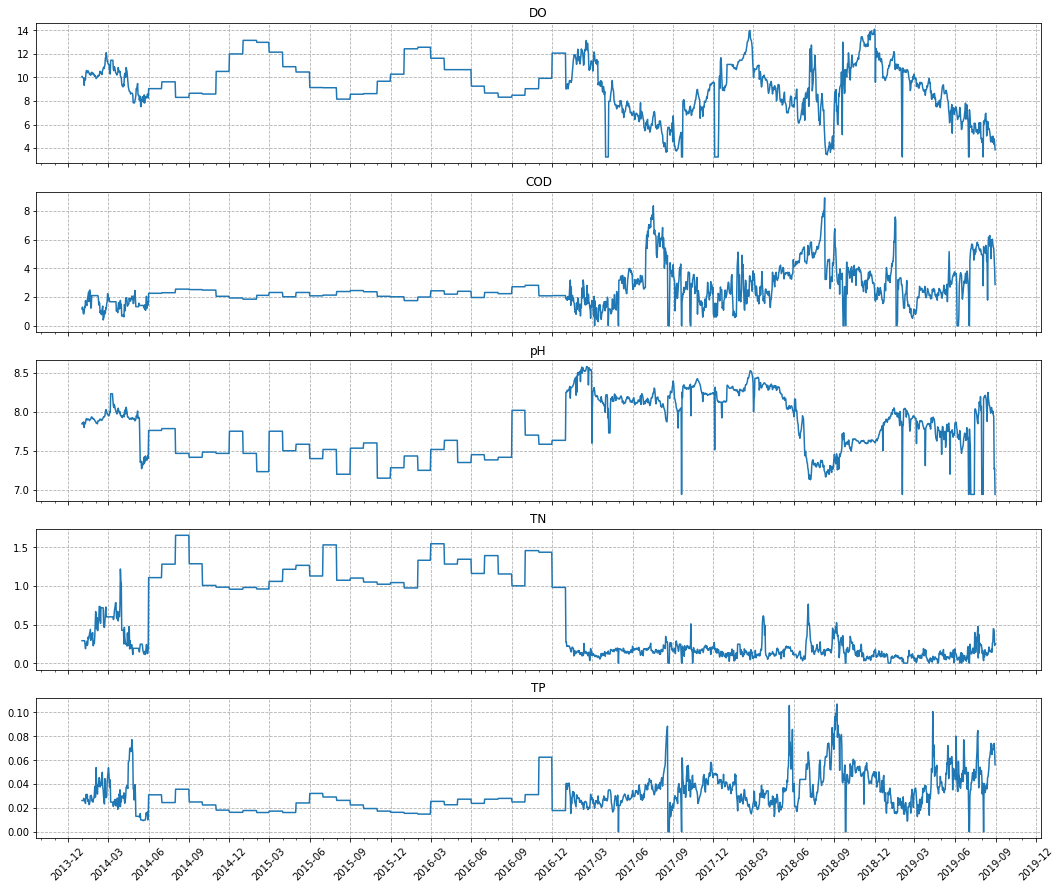

In [45]:
fig4, axs = plt.subplots(5,1,sharex=True, figsize=(18,15))
# fig.subplots_adjust(hspace=1)

plt.xticks(rotation=45)

axs[0].plot(data.Date, data.DO);
axs[0].set_title('DO')
axs[0].grid(True, linestyle='--')

axs[1].plot(data.Date, data.COD);
axs[1].set_title('COD')
axs[1].grid(True, linestyle='--')

axs[2].plot(data.Date, data.pH);
axs[2].set_title('pH')
axs[2].grid(True, linestyle='--')

axs[3].plot(data.Date, data.TN);
axs[3].set_title('TN')
axs[3].grid(True, linestyle='--')

axs[4].plot(data.Date, data.TP);
axs[4].set_title('TP')
axs[4].grid(True, linestyle='--')

axs[0].xaxis.set_major_formatter(dateFmt)  # 날짜 표시 형식
axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # 3개월마다 메인 눈금을 표시
axs[0].xaxis.set_minor_locator(mdates.MonthLocator(interval=1)) # 1개월마다 서브 눈금을 표시

In [46]:
data = data.drop(columns='y-m', axis=1)
data.head(5)

,Date,Temp,Rainfall_Dur,Rainfall_day,WindSpeed,Atm,Sunshine,DO,COD,pH,TN,TP,Min_Density,Max_Density
0,2014-01-01,7.700,0.000,0.000,5.263,"1,015.147",8.500,10.071,1.168,7.843,0.290,0.026,0,0
1,2014-01-02,7.700,0.000,0.000,1.219,"1,019.767",7.100,10.001,1.297,7.859,0.290,0.026,0,0
2,2014-01-03,7.700,0.000,0.000,1.238,"1,016.513",7.300,9.984,1.163,7.846,0.290,0.026,0,0
3,2014-01-04,7.800,0.000,0.000,2.419,"1,016.210",8.900,9.946,0.845,7.850,0.290,0.026,0,0
4,2014-01-05,7.700,0.000,0.000,2.688,"1,020.507",8.700,9.889,0.818,7.869,0.290,0.028,0,0


TN의 경우 두 데이터셋의 채수지점이 달라 농도평균 차이가 있는 것으로 판단됨

## 가설에 대한 분석
- 가설
1. 여름철에 적조현상이 빈번하게 발생한다.
    - 여름철 -> 수온↑, 일조량↑, 강수량↑

2. 이 밖에 적조 발생에 기여하는 요인이 있다.

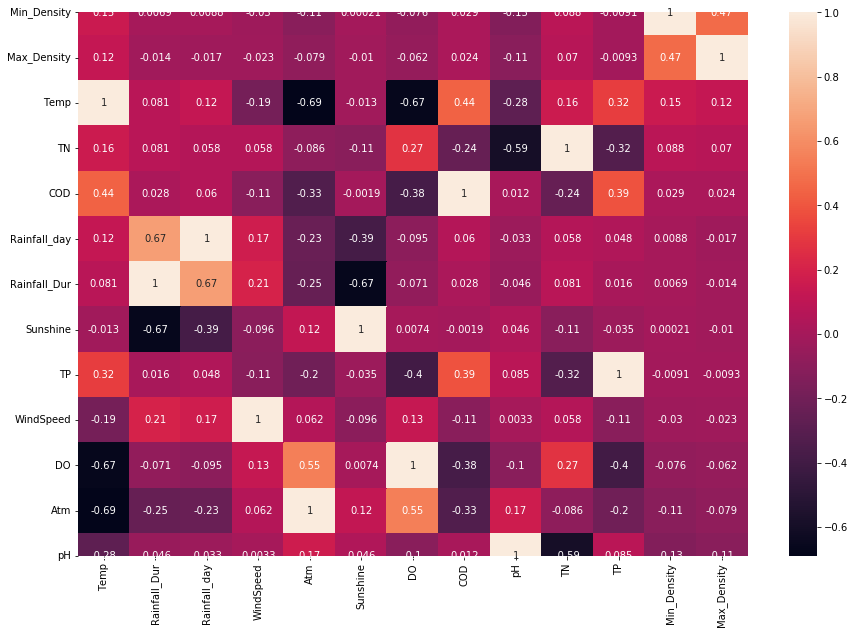

In [47]:
# 상관관계 확인
data_corr = data.corr().sort_values(by='Min_Density', ascending=False)

fig, ax = plt.subplots(figsize=(15,10))
# sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_corr, annot=True);


특성간 

양의 상관관계
- 온도 - COD : 0.44
- 강수지속시간 - 강수량 : 0.67
- 기압 - 용존산소 : 0.55

음의 상관관계
- 온도 - 기압 : -0.69
- 온도 - 용존산소 : -0.67
- 강우지속시간 - 일조시간 : -0.67
- pH - TN : -0.59

히트맵상으로 확인해보았을 때 적조생물 밀도와 관계가 높은 특성은 Temp, TN, COD, Rainfall_day의 순으로 나타난다. 

따라서 여름철과 적조현상은 높은 상관관계를 갖고 있을 것으로 보이며, 또한 계절요소 외에 TN, COD의 요소도 적조발생의 요인이 될 것으로 보인다.

## 특성공학

특성에 따른 적조발생 여부 비율을 확인하기 위해, 적조생물 밀도 특성을 주의보 발령기준에 따른 발생여부 특성으로 생성

적조 주의보 발령기준인 Cochlodinium polykrikoides 100 이상을 적조발생 기준으로 설정


In [48]:
# 적조발생여부 특성 생성
data['Cochlo_yn'] = np.where(data['Max_Density']>=100, 1, 0)
# data['Cochlo_yn'] = (data['Max_Density']>=100)
# data['Cochlo_yn'].replace((True,False) , (1,0) , inplace = True)
data = data.drop(['Min_Density','Max_Density'], axis=1)
data

,Date,Temp,Rainfall_Dur,Rainfall_day,WindSpeed,Atm,Sunshine,DO,COD,pH,TN,TP,Cochlo_yn
0,2014-01-01,7.700,0.000,0.000,5.263,"1,015.147",8.500,10.071,1.168,7.843,0.290,0.026,0
1,2014-01-02,7.700,0.000,0.000,1.219,"1,019.767",7.100,10.001,1.297,7.859,0.290,0.026,0
2,2014-01-03,7.700,0.000,0.000,1.238,"1,016.513",7.300,9.984,1.163,7.846,0.290,0.026,0
3,2014-01-04,7.800,0.000,0.000,2.419,"1,016.210",8.900,9.946,0.845,7.850,0.290,0.026,0
4,2014-01-05,7.700,0.000,0.000,2.688,"1,020.507",8.700,9.889,0.818,7.869,0.290,0.028,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,2019-08-27,25.300,12.100,22.400,2.241,"1,007.256",0.100,4.618,5.475,7.961,0.445,0.073,1
2064,2019-08-28,25.300,3.480,1.800,1.728,"1,006.672",0.400,4.336,5.391,7.934,0.443,0.071,1
2065,2019-08-29,25.000,8.530,3.500,2.265,"1,006.955",0.000,4.784,4.641,7.266,0.417,0.074,1
2066,2019-08-30,24.800,0.000,0.000,3.382,"1,008.426",11.800,4.431,3.986,7.278,0.228,0.067,1


In [49]:
# 여름철 (6~9월로 설정)의 적조생물 발생여부

summer_data = data[((data['Date']>='20140601') & (data['Date']<'20141001')) |
                 ((data['Date']>='20150601') & (data['Date']<'20151001')) |
                 ((data['Date']>='20160601') & (data['Date']<'20161001'))]
summer_data

,Date,Temp,Rainfall_Dur,Rainfall_day,WindSpeed,Atm,Sunshine,DO,COD,pH,TN,TP,Cochlo_yn
151,2014-06-01,19.500,0.000,0.000,0.987,"1,011.861",0.000,9.040,2.260,7.760,1.107,0.031,0
152,2014-06-02,19.100,8.300,8.000,3.826,"1,008.109",0.100,9.040,2.260,7.760,1.107,0.031,0
153,2014-06-03,19.000,22.750,24.400,5.812,"1,004.164",0.000,9.040,2.260,7.760,1.107,0.031,0
154,2014-06-04,19.300,7.170,5.200,6.128,"1,002.654",2.600,9.040,2.260,7.760,1.107,0.031,0
155,2014-06-05,19.800,0.000,0.000,4.090,"1,002.678",3.500,9.040,2.260,7.760,1.107,0.031,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,2016-09-26,24.300,4.750,2.000,3.223,"1,015.299",0.900,8.483,2.717,8.017,1.001,0.025,0
999,2016-09-27,24.400,3.300,0.400,1.640,"1,014.735",3.700,8.483,2.717,8.017,1.001,0.025,0
1000,2016-09-28,24.400,17.080,11.400,1.578,"1,012.991",0.000,8.483,2.717,8.017,1.001,0.025,0
1001,2016-09-29,24.100,11.780,1.900,4.690,"1,015.221",0.000,8.483,2.717,8.017,1.001,0.025,0


In [50]:
not_summer_data = data.drop(summer_data.index)
not_summer_data

,Date,Temp,Rainfall_Dur,Rainfall_day,WindSpeed,Atm,Sunshine,DO,COD,pH,TN,TP,Cochlo_yn
0,2014-01-01,7.700,0.000,0.000,5.263,"1,015.147",8.500,10.071,1.168,7.843,0.290,0.026,0
1,2014-01-02,7.700,0.000,0.000,1.219,"1,019.767",7.100,10.001,1.297,7.859,0.290,0.026,0
2,2014-01-03,7.700,0.000,0.000,1.238,"1,016.513",7.300,9.984,1.163,7.846,0.290,0.026,0
3,2014-01-04,7.800,0.000,0.000,2.419,"1,016.210",8.900,9.946,0.845,7.850,0.290,0.026,0
4,2014-01-05,7.700,0.000,0.000,2.688,"1,020.507",8.700,9.889,0.818,7.869,0.290,0.028,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,2019-08-27,25.300,12.100,22.400,2.241,"1,007.256",0.100,4.618,5.475,7.961,0.445,0.073,1
2064,2019-08-28,25.300,3.480,1.800,1.728,"1,006.672",0.400,4.336,5.391,7.934,0.443,0.071,1
2065,2019-08-29,25.000,8.530,3.500,2.265,"1,006.955",0.000,4.784,4.641,7.266,0.417,0.074,1
2066,2019-08-30,24.800,0.000,0.000,3.382,"1,008.426",11.800,4.431,3.986,7.278,0.228,0.067,1


In [51]:
summer_data['Cochlo_yn'].value_counts(normalize=True)

0   0.833
1   0.167
Name: Cochlo_yn, dtype: float64

In [52]:
not_summer_data['Cochlo_yn'].value_counts(normalize=True)

0   0.985
1   0.015
Name: Cochlo_yn, dtype: float64

-> 적조발생은 거의 여름철에 발생함을 확인

In [53]:
# (확인용) 여름철, 비여름철 특성별 평균값 확인
season_mean = pd.DataFrame()
season_mean['Summer'] = summer_data.mean()
season_mean['not_Summer'] = not_summer_data.mean()
season_mean = season_mean.drop('Cochlo_yn', axis=0)
season_mean.T

<ipython-input-53-37987b625300>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  season_mean['Summer'] = summer_data.mean()
<ipython-input-53-37987b625300>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  season_mean['not_Summer'] = not_summer_data.mean()


,Temp,Rainfall_Dur,Rainfall_day,WindSpeed,Atm,Sunshine,DO,COD,pH,TN,TP
Summer,23.563,3.023,6.087,2.853,"1,008.292",6.128,8.773,2.326,7.528,1.241,0.028
not_Summer,15.029,2.111,3.437,3.053,"1,016.792",7.080,9.478,2.634,7.800,0.512,0.032


In [54]:
# (확인용) 적조발생시와 미발생시 특성별 평균값 확인

Y_data = data[data['Cochlo_yn']==1]
N_data = data[data['Cochlo_yn']==0]

In [55]:
df_mean = pd.DataFrame()
df_mean['yes'] = Y_data.mean()
df_mean['no'] = N_data.mean()
df_mean.T

<ipython-input-55-a6c5fcd56c61>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_mean['yes'] = Y_data.mean()
<ipython-input-55-a6c5fcd56c61>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_mean['no'] = N_data.mean()


,Temp,Rainfall_Dur,Rainfall_day,WindSpeed,Atm,Sunshine,DO,COD,pH,TN,TP,Cochlo_yn
yes,25.477,1.939,3.202,2.636,"1,008.342",7.506,7.777,3.432,7.399,0.911,0.034,1.000
no,16.152,2.287,3.937,3.034,"1,015.589",6.885,9.422,2.543,7.767,0.629,0.031,0.000


적조발생 예측은 순간의 변수에 따라 타겟값이 결정되지 않으므로 직전 7일 평균값 특성 생성

In [56]:
# 다음날의 적조발생여부 예측
# 7일 평균값 특성 생성
df = data.copy()

df['m_Temp'] = df['Temp'].rolling(7).sum().shift(1) / 7
df['m_Rainfall_Dur'] = df['Rainfall_Dur'].rolling(7).sum().shift(1) / 7
df['m_Rainfall_day'] = df['Rainfall_day'].rolling(7).sum().shift(1) / 7
df['m_WindSpeed'] = df['WindSpeed'].rolling(7).sum().shift(1) / 7
df['m_Atm'] = df['Atm'].rolling(7).sum().shift(1) / 7
df['m_Sunshine'] = df['Sunshine'].rolling(7).sum().shift(1) / 7
df['m_DO'] = df['DO'].rolling(7).sum().shift(1) / 7
df['m_COD'] = df['COD'].rolling(7).sum().shift(1) / 7
df['m_pH'] = df['pH'].rolling(7).sum().shift(1) / 7
df['m_TN'] = df['TN'].rolling(7).sum().shift(1) / 7
df['m_TP'] = df['TP'].rolling(7).sum().shift(1) / 7

df = df.drop(['Temp', 'Rainfall_Dur', 'Rainfall_day', 'WindSpeed', 'Atm', 'Sunshine',
        'DO', 'COD', 'pH', 'TN', 'TP'], axis=1)

df.head(10)

,Date,Cochlo_yn,m_Temp,m_Rainfall_Dur,m_Rainfall_day,m_WindSpeed,m_Atm,m_Sunshine,m_DO,m_COD,m_pH,m_TN,m_TP
0,2014-01-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-02,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-05,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-01-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-01-07,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-01-08,0,7.686,0.000,0.000,2.242,"1,019.814",7.971,9.878,1.075,7.846,0.290,0.026
8,2014-01-09,0,7.657,1.383,0.600,2.069,"1,020.224",6.786,9.834,1.090,7.846,0.283,0.026
9,2014-01-10,0,7.557,1.383,0.600,2.718,"1,020.926",7.071,9.808,1.155,7.846,0.268,0.026


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2068 non-null   datetime64[ns]
 1   Cochlo_yn       2068 non-null   int64         
 2   m_Temp          2061 non-null   float64       
 3   m_Rainfall_Dur  2061 non-null   float64       
 4   m_Rainfall_day  2061 non-null   float64       
 5   m_WindSpeed     2061 non-null   float64       
 6   m_Atm           2061 non-null   float64       
 7   m_Sunshine      2061 non-null   float64       
 8   m_DO            2061 non-null   float64       
 9   m_COD           2061 non-null   float64       
 10  m_pH            2061 non-null   float64       
 11  m_TN            2061 non-null   float64       
 12  m_TP            2061 non-null   float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 290.7 KB


In [58]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 7 to 2067
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2061 non-null   datetime64[ns]
 1   Cochlo_yn       2061 non-null   int64         
 2   m_Temp          2061 non-null   float64       
 3   m_Rainfall_Dur  2061 non-null   float64       
 4   m_Rainfall_day  2061 non-null   float64       
 5   m_WindSpeed     2061 non-null   float64       
 6   m_Atm           2061 non-null   float64       
 7   m_Sunshine      2061 non-null   float64       
 8   m_DO            2061 non-null   float64       
 9   m_COD           2061 non-null   float64       
 10  m_pH            2061 non-null   float64       
 11  m_TN            2061 non-null   float64       
 12  m_TP            2061 non-null   float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 225.4 KB


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a futu

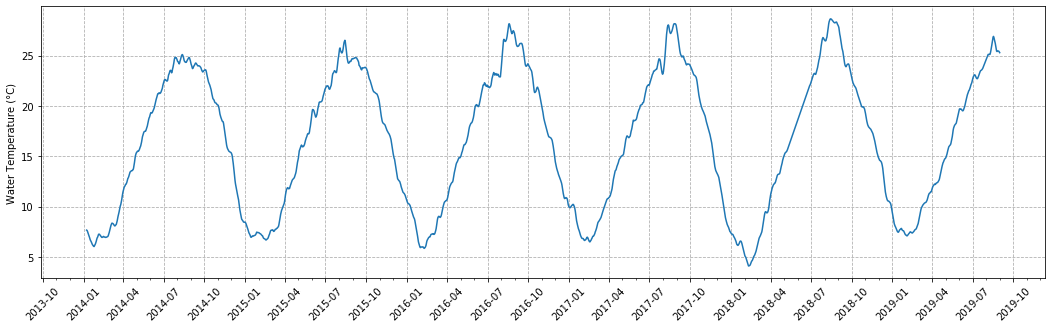

In [59]:
fig5, ax5 = plt.subplots(figsize=(18,5))

plt.ylabel('Water Temperature (°C)')
plt.xticks(rotation=45)
ax5.plot(df.Date, df.m_Temp);

ax5.xaxis.set_major_formatter(dateFmt)  # 날짜 표시 형식
ax5.xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # 3개월마다 메인 눈금을 표시
ax5.xaxis.set_minor_locator(mdates.MonthLocator(interval=1)) # 1개월마다 서브 눈금을 표시

plt.grid(True, linestyle='--')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed

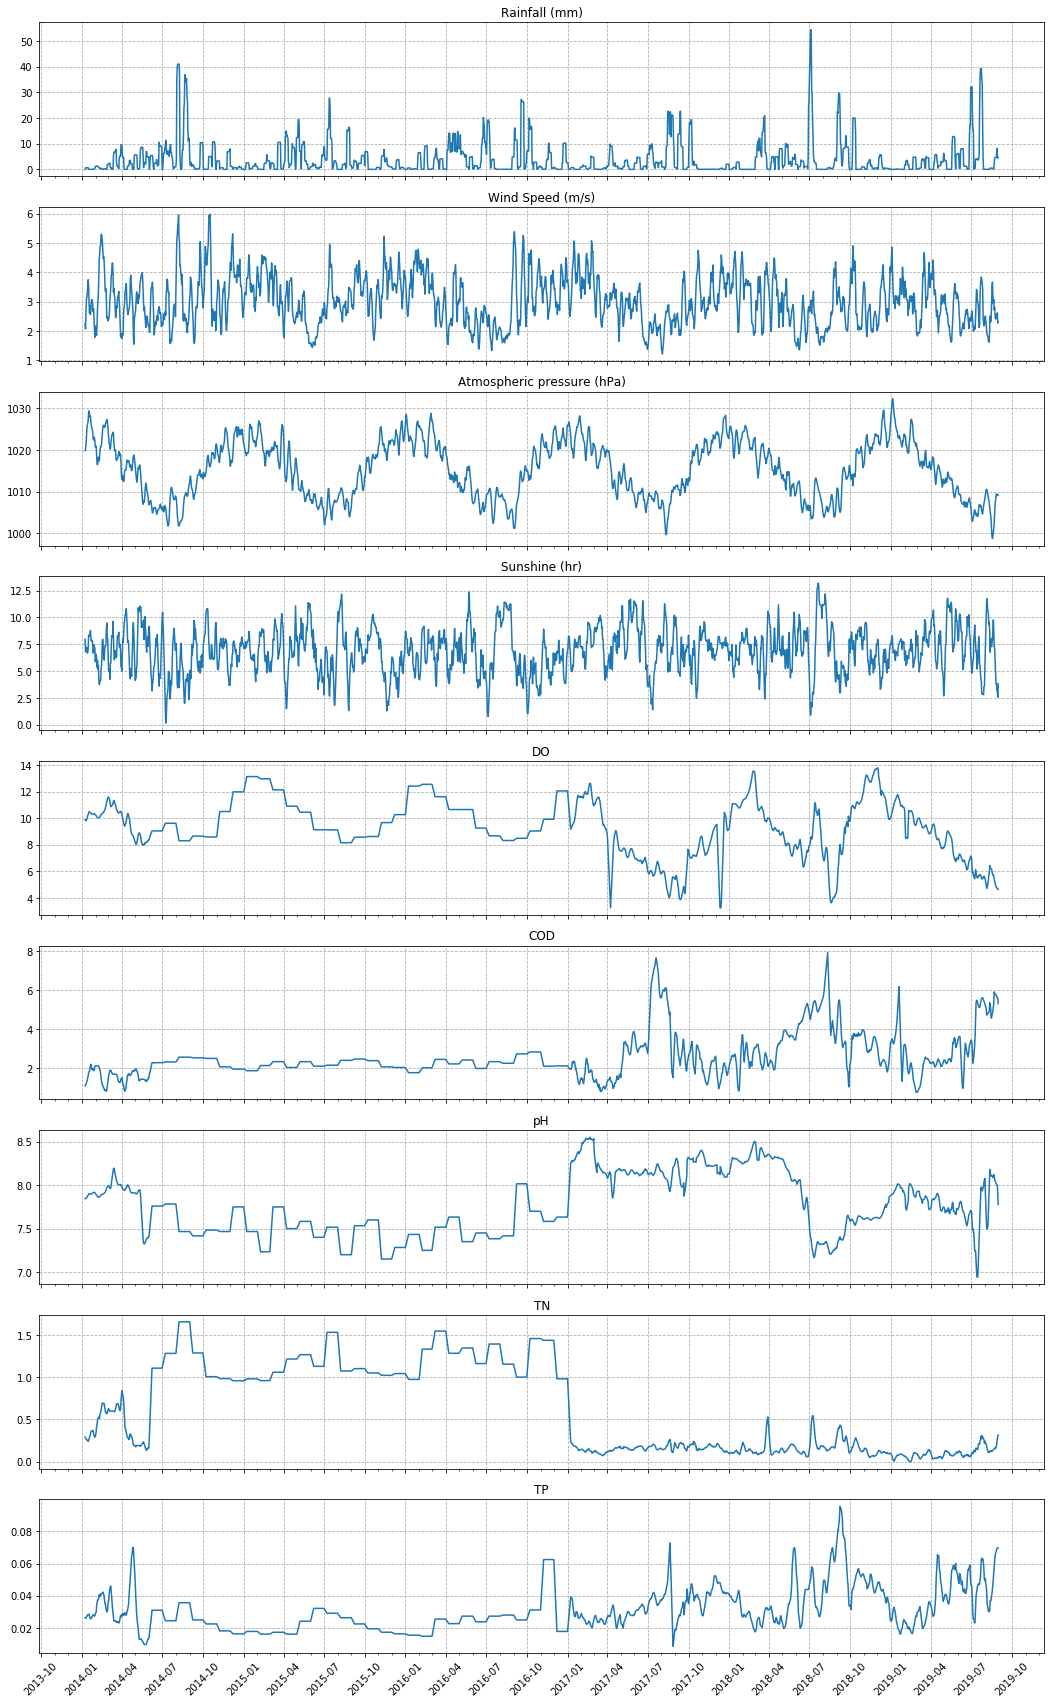

In [60]:
fig6, axs = plt.subplots(9,1,sharex=True, figsize=(18,30))
# fig.subplots_adjust(hspace=1)

plt.xticks(rotation=45)
axs[0].plot(df.Date, df.m_Rainfall_day);
axs[0].set_title('Rainfall (mm)')
axs[0].grid(True, linestyle='--')

axs[1].plot(df.Date, df.m_WindSpeed);
axs[1].set_title('Wind Speed (m/s)')
axs[1].grid(True, linestyle='--')

axs[2].plot(df.Date, df.m_Atm);
axs[2].set_title('Atmospheric pressure (hPa)')
axs[2].grid(True, linestyle='--')

axs[3].plot(df.Date, df.m_Sunshine);
axs[3].set_title('Sunshine (hr)')
axs[3].grid(True, linestyle='--')

axs[4].plot(df.Date, df.m_DO);
axs[4].set_title('DO')
axs[4].grid(True, linestyle='--')

axs[5].plot(df.Date, df.m_COD);
axs[5].set_title('COD')
axs[5].grid(True, linestyle='--')

axs[6].plot(df.Date, df.m_pH);
axs[6].set_title('pH')
axs[6].grid(True, linestyle='--')

axs[7].plot(df.Date, df.m_TN);
axs[7].set_title('TN')
axs[7].grid(True, linestyle='--')

axs[8].plot(df.Date, df.m_TP);
axs[8].set_title('TP')
axs[8].grid(True, linestyle='--')

axs[0].xaxis.set_major_formatter(dateFmt)  # 날짜 표시 형식
axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # 3개월마다 메인 눈금을 표시
axs[0].xaxis.set_minor_locator(mdates.MonthLocator(interval=1)) # 1개월마다 서브 눈금을 표시

# 4 모델링

## 타겟분포 확인

0   0.958
1   0.042
Name: Cochlo_yn, dtype: float64


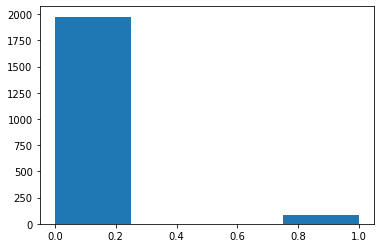

In [61]:
# 타겟특성 분포 확인
plt.figure(figsize=(6,4))
plt.hist(df['Cochlo_yn'], bins=4);
print(df.Cochlo_yn.value_counts(normalize=True))

-> 불균형 클래스. ml 적용시 class_weight 조절

## logistic 회귀분석

In [62]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [63]:
pd.set_option('display.float_format', None)

In [64]:
df2 = df.copy()
df2 = df2.drop('Date', axis=1).reset_index(drop=True)
df2.head()

,Cochlo_yn,m_Temp,m_Rainfall_Dur,m_Rainfall_day,m_WindSpeed,m_Atm,m_Sunshine,m_DO,m_COD,m_pH,m_TN,m_TP
0,0,7.685714,0.000000,0.0,2.241964,1019.813571,7.971429,9.877769,1.075438,7.845976,0.290400,0.026396
1,0,7.657143,1.382857,0.6,2.068750,1020.223631,6.785714,9.834114,1.090010,7.846190,0.283286,0.026392
2,0,7.557143,1.382857,0.6,2.717798,1020.925714,7.071429,9.808460,1.154867,7.846048,0.268414,0.026043
3,0,7.428571,1.382857,0.6,3.105595,1022.959940,7.214286,9.864692,1.204748,7.853075,0.262417,0.026774
4,0,7.300000,1.382857,0.6,3.127798,1025.012381,7.157143,9.955406,1.300058,7.861801,0.256419,0.027504


In [65]:
# 데이터셋 분할

target = 'Cochlo_yn'

train, test = train_test_split(df2, train_size=0.80, test_size=0.20, 
                              stratify=df2[target], random_state=2)
train, val = train_test_split(train, train_size=0.90, test_size=0.10, 
                              stratify=train[target], random_state=2)
print(train.shape, val.shape, test.shape)

(1483, 12) (165, 12) (413, 12)


In [66]:
# 특성, 타겟 분리
features = train.drop(columns=[target]).columns
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [67]:
# tscv = TimeSeriesSplit(n_splits=4)
# for train_index, val_index in tscv.split(train):
#     # print("TRAIN:", train_index, "Validation", val_index)
#     X_train, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
#     y_train, y_val = y_train[train_index], y_train[val_index]
#     # print(len(X_train), len(y_train), len(X_val), len(X_val))

In [68]:
# # 기준모델  (최빈값 0으로 전체 예측했을 경우)
# print("training accuracy: ", train[target].value_counts(normalize=True).max())

In [69]:
# 기준모델
logis = LogisticRegression(random_state=42)
logis.fit(X_train, y_train)

print('train Accuracy Score:',logis.score(X_train, y_train))
y_pred = logis.predict(X_val)
print('val. Accuracy Score:',accuracy_score(y_val, y_pred))
print('val. F1 Score:',f1_score(y_val, y_pred))
print('val. F1 Score:',f1_score(y_val, y_pred))
y_pred_proba = logis.predict_proba(X_val)[:,-1]
print('val. AUC Score:', roc_auc_score(y_val, y_pred_proba))

train Accuracy Score: 0.9602157788267026
val. Accuracy Score: 0.9575757575757575
val. F1 Score: 0.22222222222222224
val. F1 Score: 0.22222222222222224
val. AUC Score: 0.9475587703435804


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
# 모델 학습
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42, class_weight='balanced')
)

dists = {
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__C': [1 , 0.5, 0.1, 0.05, 0.01],
    'logisticregression__solver': ['liblinear', 'lbfgs'],
    'logisticregression__max_iter': [100,200,300]
}

clf = RandomizedSearchCV(
    pipe,
    param_distributions = dists,
    n_iter = 10,
    cv = 3,
    scoring = 'roc_auc',
    verbose = 1,
    n_jobs = -1,
    random_state = 42
)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('logisticregression',
                                              LogisticRegression(class_weight='balanced',
                                                                 random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'logisticregression__C': [1, 0.5, 0.1,
                                                                  0.05, 0.01],
                                        'logisticregression__max_iter': [100,
                                                                         200,
                                                                         300],
                                        'logisticregression__penalty': ['l1',
                                                                        'l2'],
                      

In [71]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('auc : ', clf.best_score_)

최적 하이퍼파라미터:  {'logisticregression__solver': 'liblinear', 'logisticregression__penalty': 'l1', 'logisticregression__max_iter': 100, 'logisticregression__C': 1}
auc :  0.9602764081936881


In [72]:
best_model = clf.best_estimator_ # 최적의 파라미터 조합이 적용된 모델

In [73]:
def show_result(my_pipe, X_data = X_val, y_data = y_val, threshold = 0.5):
    y_pred_proba = my_pipe.predict_proba(X_data)[:,-1]
    y_pred = y_pred_proba >= threshold
    print('Precision Score: ',precision_score(y_data, y_pred)) 
    print('Recall Score: ',recall_score(y_data, y_pred))
    print('F1 Score:',f1_score(y_data, y_pred))
    print('Accuracy Score:',accuracy_score(y_data, y_pred))
    
    y_pred_proba = my_pipe.predict_proba(X_data)[:,-1]
    print('AUC Score:', roc_auc_score(y_data, y_pred_proba))

In [74]:
show_result(best_model)

Precision Score:  0.2857142857142857
Recall Score:  0.8571428571428571
F1 Score: 0.42857142857142855
Accuracy Score: 0.9030303030303031
AUC Score: 0.9629294755877035


In [75]:
def draw_roc(my_pipe):
  y_pred_proba = my_pipe.predict_proba(X_val)[:,-1]
  threshold = np.arange(0.1,0.6,0.02)
  fprs, tprs, th = roc_curve(y_val, y_pred_proba)
  plt.plot(fprs , tprs, label='ROC')

  for t in threshold:
    y_pred = y_pred_proba >= t
    val_f1 = round(f1_score(y_val, y_pred),4)
    val_roc = round(roc_auc_score(y_val, y_pred),4)
    print(round(t,2), val_f1, val_roc)

0.1 0.3256 0.9082
0.12 0.3333 0.9114
0.14 0.3333 0.9114
0.16 0.35 0.9177
0.18 0.359 0.9209
0.2 0.3684 0.9241
0.22 0.3684 0.9241
0.24 0.3684 0.9241
0.26 0.3784 0.9272
0.28 0.3889 0.9304
0.3 0.3889 0.9304
0.32 0.3889 0.9304
0.34 0.4118 0.9367
0.36 0.4118 0.9367
0.38 0.4118 0.9367
0.4 0.4118 0.9367
0.42 0.375 0.8684
0.44 0.4 0.8748
0.46 0.4 0.8748
0.48 0.4286 0.8811
0.5 0.4286 0.8811
0.52 0.4286 0.8811
0.54 0.4286 0.8811
0.56 0.4286 0.8811
0.58 0.4286 0.8811


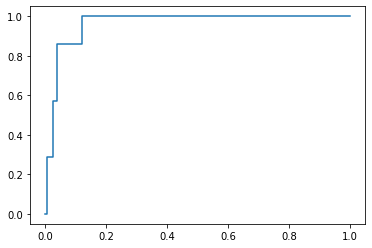

In [76]:
draw_roc(best_model)

In [77]:
show_result(best_model, threshold = 0.34) # f1 score, auc가 높은 임계값 3.4 설정

Precision Score:  0.25925925925925924
Recall Score:  1.0
F1 Score: 0.4117647058823529
Accuracy Score: 0.8787878787878788
AUC Score: 0.9629294755877035


## RandomForest

In [78]:
from scipy.stats import randint, uniform
# 모델 학습
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

dists = {
    'n_estimators': randint(50, 500), 
    'max_depth' : [None,5,10,15,20],
    'max_samples' : [None,0.2,0.4,0.7,1.0]
}

clf = RandomizedSearchCV(
    rf,
    param_distributions = dists,
    n_iter = 10,
    cv = 3,
    scoring = 'roc_auc',
    verbose = 1,
    n_jobs = -1,
    random_state = 42
)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'max_samples': [None, 0.2, 0.4, 0.7,
                                                        1.0],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcb1d1578e0>},
                   random_state=42, scoring='roc_auc', verbose=1)

In [79]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('auc : ', clf.best_score_)

최적 하이퍼파라미터:  {'max_depth': 15, 'max_samples': 1.0, 'n_estimators': 210}
auc :  0.991465551260959


In [80]:
best_model = clf.best_estimator_ # 최적의 파라미터 조합이 적용된 모델

show_result(best_model)

Precision Score:  1.0
Recall Score:  0.7142857142857143
F1 Score: 0.8333333333333333
Accuracy Score: 0.9878787878787879
AUC Score: 0.9990958408679927


0.1 0.7778 0.9873
0.12 0.875 0.9937
0.14 0.9333 0.9968
0.16 0.9333 0.9968
0.18 0.8571 0.9254
0.2 0.8571 0.9254
0.22 0.8571 0.9254
0.24 0.9231 0.9286
0.26 0.9231 0.9286
0.28 0.9231 0.9286
0.3 0.9231 0.9286
0.32 0.9231 0.9286
0.34 0.9231 0.9286
0.36 0.9231 0.9286
0.38 0.9231 0.9286
0.4 0.9231 0.9286
0.42 0.9231 0.9286
0.44 0.9231 0.9286
0.46 0.8333 0.8571
0.48 0.8333 0.8571
0.5 0.8333 0.8571
0.52 0.8333 0.8571
0.54 0.8333 0.8571
0.56 0.7273 0.7857
0.58 0.7273 0.7857


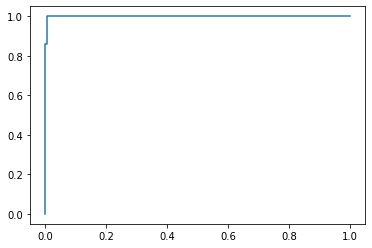

In [81]:
draw_roc(best_model)

In [82]:
show_result(best_model, threshold = 0.3)

Precision Score:  1.0
Recall Score:  0.8571428571428571
F1 Score: 0.923076923076923
Accuracy Score: 0.9939393939393939
AUC Score: 0.9990958408679927


## 최종모델 일반화 성능
Logistic 회귀분석보다 랜덤포레스트 모델의 성능이 더 우수하게 나오므로 최종모델로 랜덤포레스트 이용

In [83]:
y_test = test[target]

In [84]:
show_result(best_model, X_data = X_test, y_data = y_test, threshold = 0.3)

Precision Score:  0.8421052631578947
Recall Score:  0.9411764705882353
F1 Score: 0.8888888888888888
Accuracy Score: 0.9903147699757869
AUC Score: 0.9979203802733214


# 5 모델 해석

## PDP 
PDP에서는 각 변수들이 서로 상관관계가 없다고 가정하므로 해석에 주의

In [85]:
# !pip install pdpbox
# !pip install shap

In [86]:
plt.rcParams['figure.dpi'] = 100

In [87]:
X_val.head(5)

,m_Temp,m_Rainfall_Dur,m_Rainfall_day,m_WindSpeed,m_Atm,m_Sunshine,m_DO,m_COD,m_pH,m_TN,m_TP
1373,22.971429,4.545714,3.171429,2.355298,1018.524107,6.442857,7.185512,2.042607,8.266881,0.238101,0.038674
561,23.400000,4.972857,3.328571,2.833395,1007.635060,2.385714,9.116667,2.133333,7.516667,1.531167,0.029167
1725,23.071429,0.797143,0.014286,3.155714,1016.046667,6.814286,9.766945,2.126738,7.597600,0.103592,0.033650
1808,10.571429,0.988571,0.428571,2.362143,1022.005595,5.100000,10.926437,1.956138,7.758265,0.099237,0.037256
1419,13.614286,0.261429,0.042857,2.998631,1023.154286,6.300000,9.222845,2.419024,8.225571,0.172206,0.051929


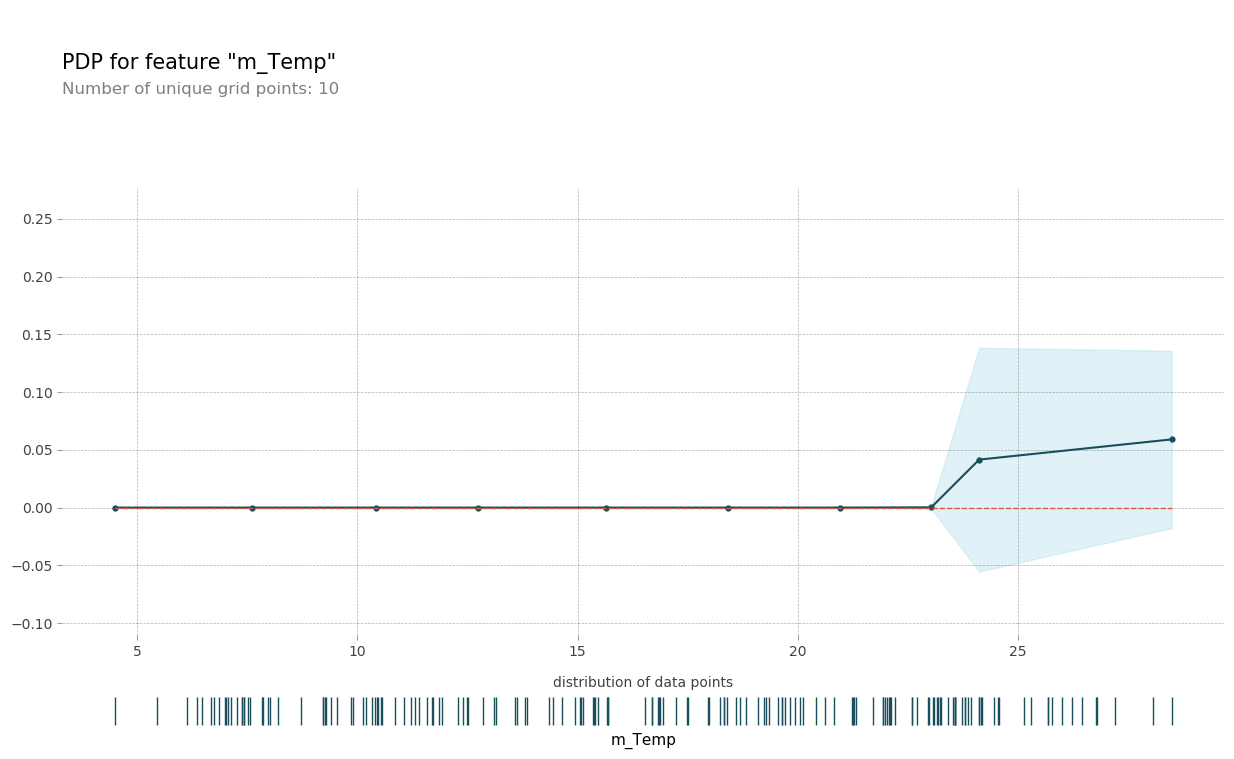

In [88]:
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact_plot, pdp_interact

feature = 'm_Temp'

isolated = pdp_isolate(
    model=best_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature, plot_pts_dist = True);

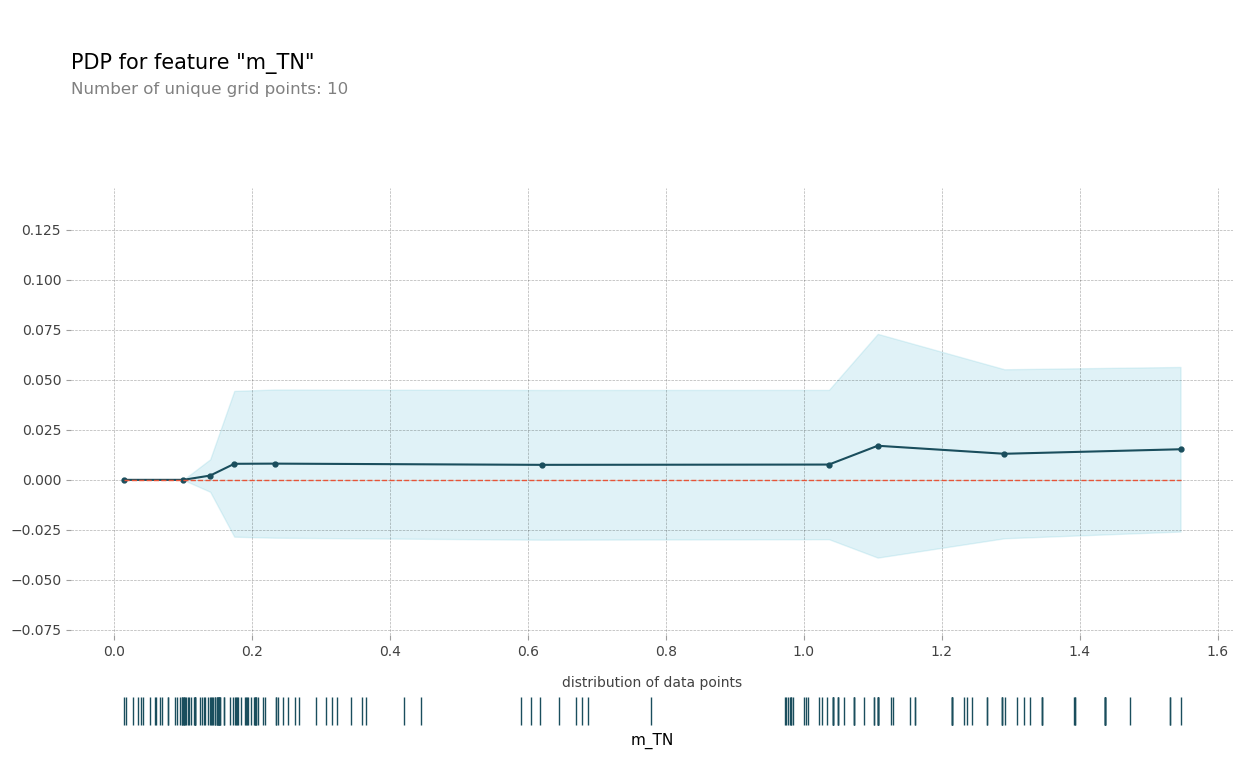

In [89]:
feature = 'm_TN'

isolated = pdp_isolate(
    model=best_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature, plot_pts_dist = True);

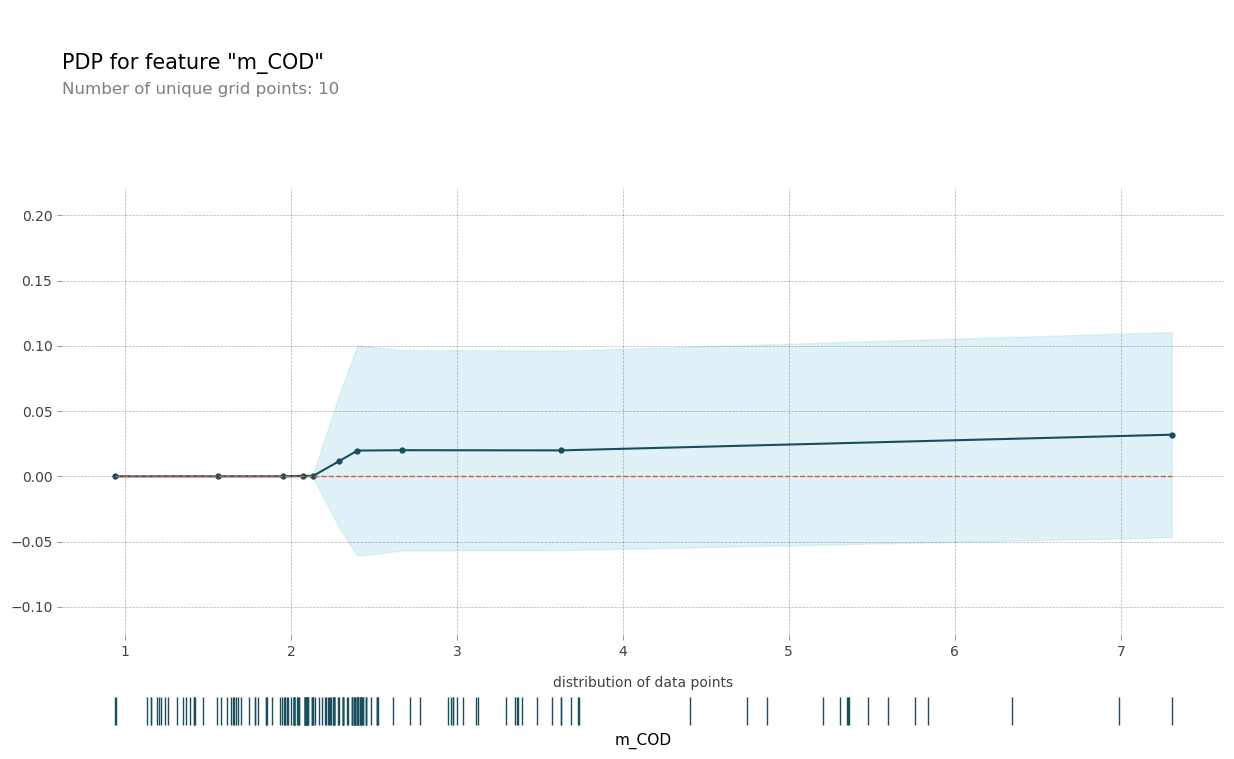

In [90]:
feature = 'm_COD'

isolated = pdp_isolate(
    model=best_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature, plot_pts_dist = True);

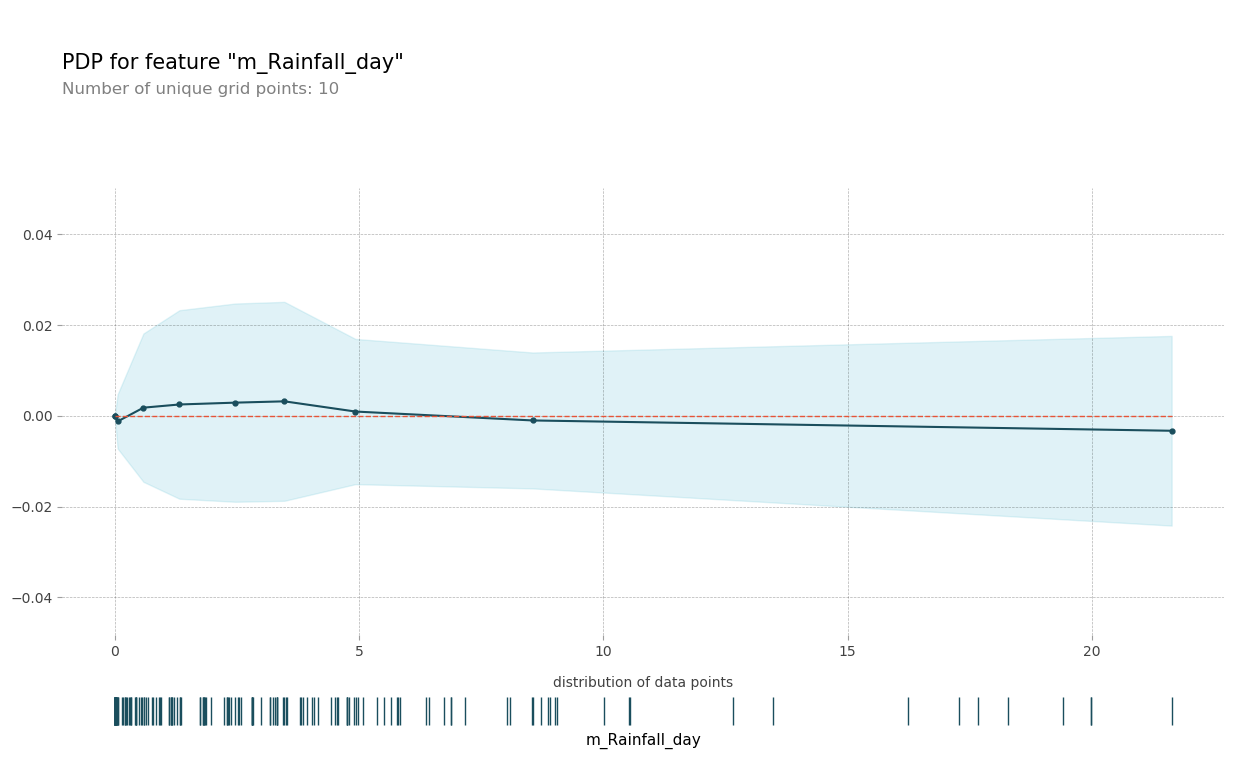

In [91]:
feature = 'm_Rainfall_day'

isolated = pdp_isolate(
    model=best_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature, plot_pts_dist = True);

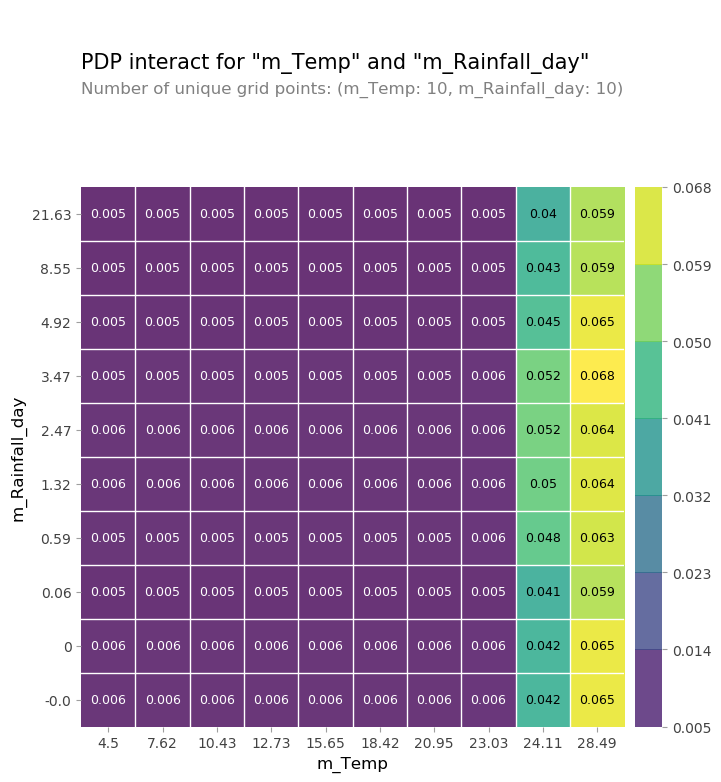

In [92]:
features = ['m_Temp', 'm_Rainfall_day'] 

interaction = pdp_interact(
    model=best_model, 
    dataset=X_val,
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

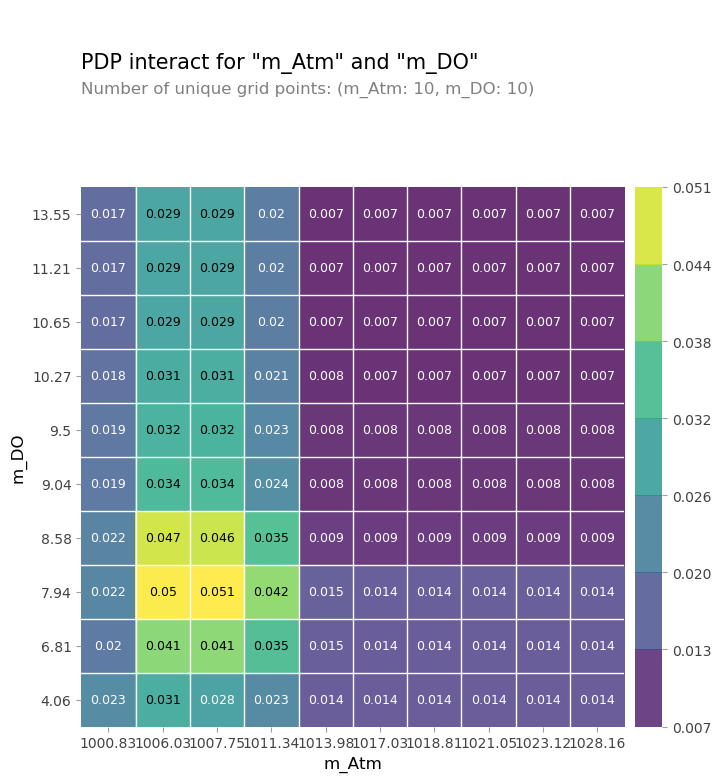

In [93]:
features = ['m_Atm', 'm_DO'] 

interaction = pdp_interact(
    model=best_model, 
    dataset=X_val,
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

## SHAP

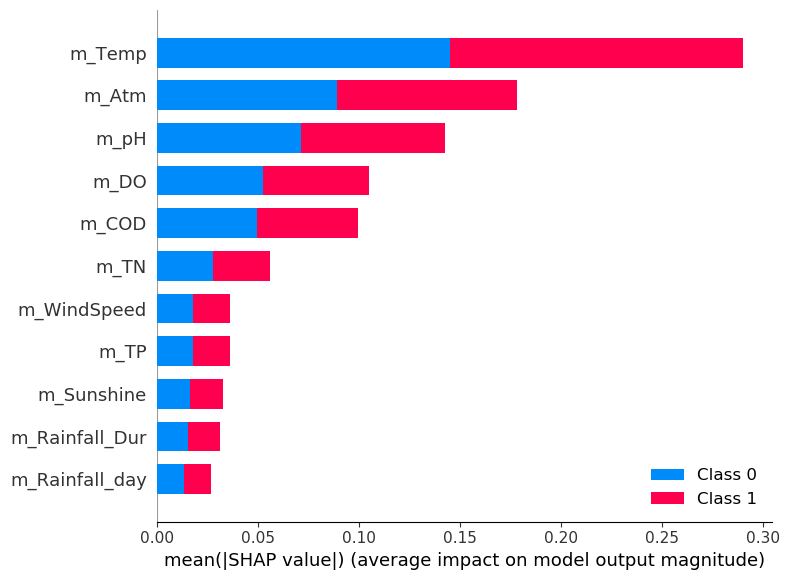

In [94]:
# shap
import shap
explainer = shap.TreeExplainer(best_model)
shap.initjs()

shap_values = explainer.shap_values(X_test.iloc[:300])
shap.summary_plot(shap_values, X_test.iloc[:300]) 